# Support Vector Machine approach

In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
X = np.load("Datasets/kryptonite-18-X.npy")
y = np.load("Datasets/kryptonite-18-Y.npy")

print(f"Shape of the dataset: {X.shape}")
print(f"Shape of the dataset: {y.shape}")


Shape of the dataset: (36000, 18)
Shape of the dataset: (36000,)


In [22]:
# Split into train and test sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## SVM on n = 9

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'lin', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train the best model on the training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   4.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=lin; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=lin; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=lin; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=lin; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=lin; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   2.6s
[CV] END .....................C=0.1, gamma=0.01

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9593
Test Accuracy: 0.9542
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1793
           1       0.95      0.95      0.95      1807

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600



## SVM on n=12

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1],
    'kernel': ['rbf']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train the best model on the training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  15.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  16.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  15.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  15.7s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  15.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=  17.3s
[CV] END ..........................C=10, gamma=1,

## SVM on n=15

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for grid search
param_grid = {
    'C': [10],
    'gamma': [4],
    'kernel': ['rbf']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train the best model on the training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  39.5s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  36.7s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  37.0s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  36.7s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  39.2s
Best Parameters: {'C': 10, 'gamma': 4, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.5384
Test Accuracy: 0.5490
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.10      0.18      3594
           1       0.53      1.00      0.69      3606

    accuracy                           0.55      7200
   macro avg       0.74      0.55      0.44      7200
weighted avg       0.74      0.55      0.44      7200



## SVM on n=18

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for grid search
param_grid = {
    'C': [1, 10],
    'gamma': [4],
    'kernel': ['rbf']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train the best model on the training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...........................C=1, gamma=4, kernel=rbf; total time=  25.1s
[CV] END ...........................C=1, gamma=4, kernel=rbf; total time=  29.9s
[CV] END ...........................C=1, gamma=4, kernel=rbf; total time=  28.1s
[CV] END ...........................C=1, gamma=4, kernel=rbf; total time=  28.3s
[CV] END ...........................C=1, gamma=4, kernel=rbf; total time=  39.4s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  40.2s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  38.9s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  37.5s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  37.2s
[CV] END ..........................C=10, gamma=4, kernel=rbf; total time=  39.3s
Best Parameters: {'C': 10, 'gamma': 4, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.5384
Test Accuracy: 0.5490
Classification R

## SVM on n=24

## SVM on n=30

## SVM on n=45

# Accuracy line graph

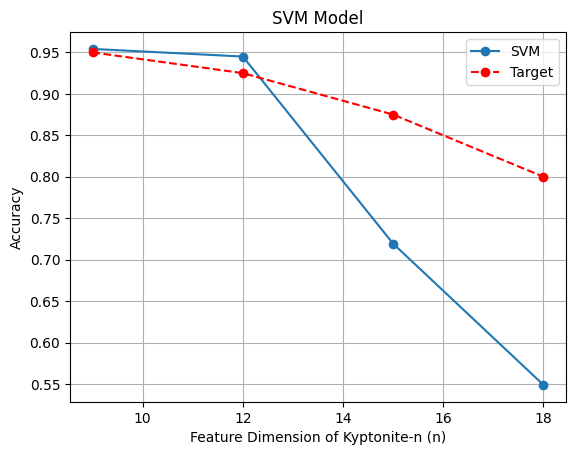

In [26]:
import matplotlib.pyplot as plt


x = 9, 12, 15, 18
y = 0.9542, 0.9450, 0.7193, 0.5490
x2 = 9, 12, 15, 18
y2 = 0.95, 0.925, 0.875, 0.8

plt.plot(x, y, marker='o')
plt.plot(x2, y2, marker='o', linestyle='--', color='r')
plt.legend(['SVM', 'Target'])
plt.title('SVM Model')
plt.xlabel('Feature Dimension of Kyptonite-n (n)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('svm_accuracy_plot.png')
plt.show()
